In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Prediction of House Prices: Data Exploration

In [2]:
db_pth = '/home/henri/Documents/Lighthouse lab/Databases/w3-d3-db/house_prices/train.csv'

df_train = pd.read_csv(db_pth) # relative path use the forward slash
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# we want to know the size of our db train set
df_train.shape

(1460, 81)

In [4]:
#what dtypes are in each columns of our pd.DF
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [5]:
# really cool way to check for duplicates
#check for dupes for Id
idsUnique = len(set(df_train.Id))
idsTotal = df_train.shape[0]
idsdupe = idsTotal - idsUnique
print(idsdupe)
#drop id col
df_train.drop(['Id'],axis =1,inplace=True)

0


In [6]:
# descriptive statistics
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/home/henri/miniconda2/envs/lighthouse-lab-course/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

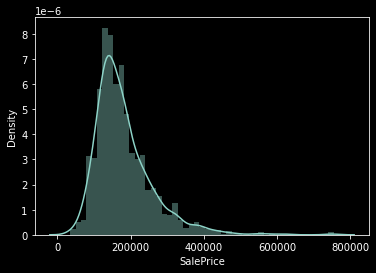

In [7]:
# histogram
plt.style.use('dark_background')
sns.distplot(df_train['SalePrice'])

Predictors

Firstly, let's start with some common sense (or domain knowledge):

   * Do we think about this variable when we are buying a house? (e.g. when we think about the house of our dreams, do we care about its 'Masonry veneer type'?).
   * If so, how important would this variable be? (e.g. what is the impact of having 'Excellent' material on the exterior instead of 'Poor'? And of having 'Excellent' instead of 'Good'?).
   * Is this information already described in any other variable? (e.g. if 'LandContour' gives the flatness of the property, do we really need to know the 'LandSlope'?).


In [8]:
#easy way to see a sorted columns/index vuew of your database.
#since it returns a list you can use them for key access
sorted(list(df_train.columns))[:5] #there are 81 columns so for ease of view we chose to only see 5 columns

['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr']

Numerical Variables

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

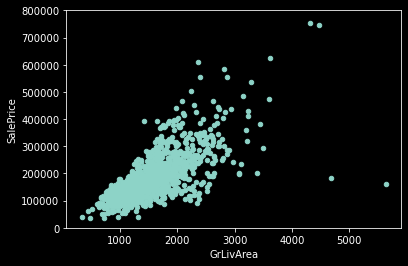

In [9]:
#scatter plot grlivarea vs. SalePrice
var = 'GrLivArea' #Above grade (ground) living area square feet
data = df_train[['SalePrice',var]]
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

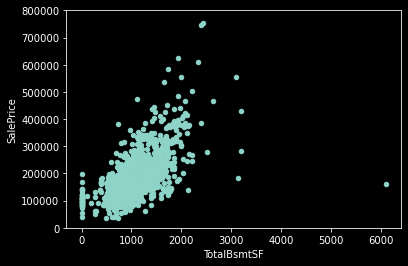

In [10]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF' #: Total square feet of basement area
data = df_train[['SalePrice',var]]
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

## Categorical Variables

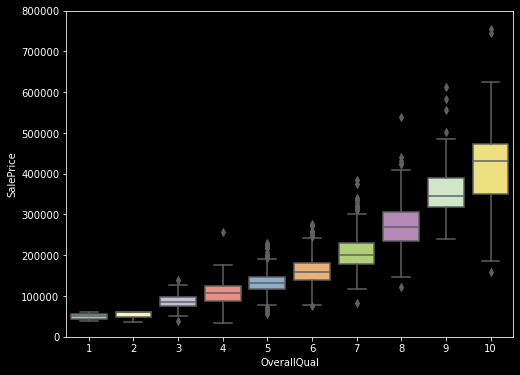

In [11]:
# overallqual
'''OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor'''

var = 'OverallQual'
data = df_train[['SalePrice',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.show()

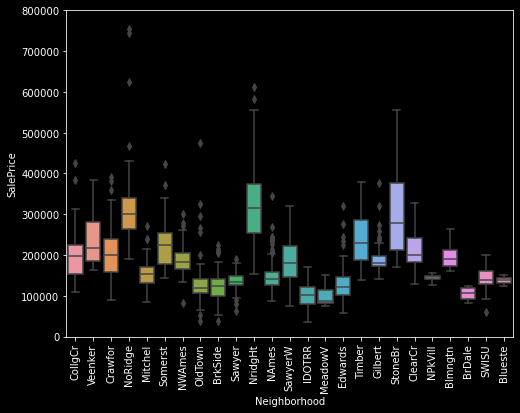

In [12]:
# Neighborhood
"""Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker"""

var = 'Neighborhood'
data = df_train[['SalePrice',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)
plt.show() #otherwise shows you bunch of data

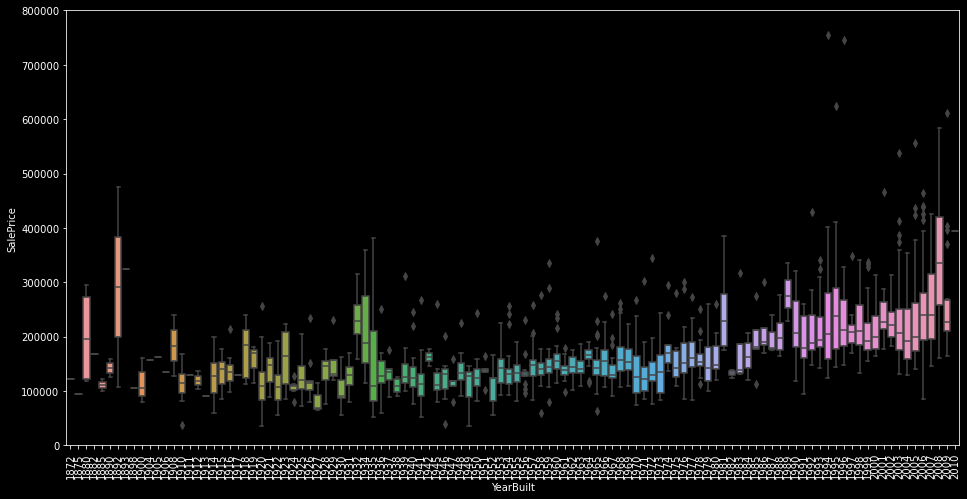

In [13]:
# YearBuilt
var = 'YearBuilt'
data = df_train[['SalePrice',var]]
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)
plt.show()

## Multivariate Analysis

Let's look at a correlation matrix between numeric attributes:

<AxesSubplot:>

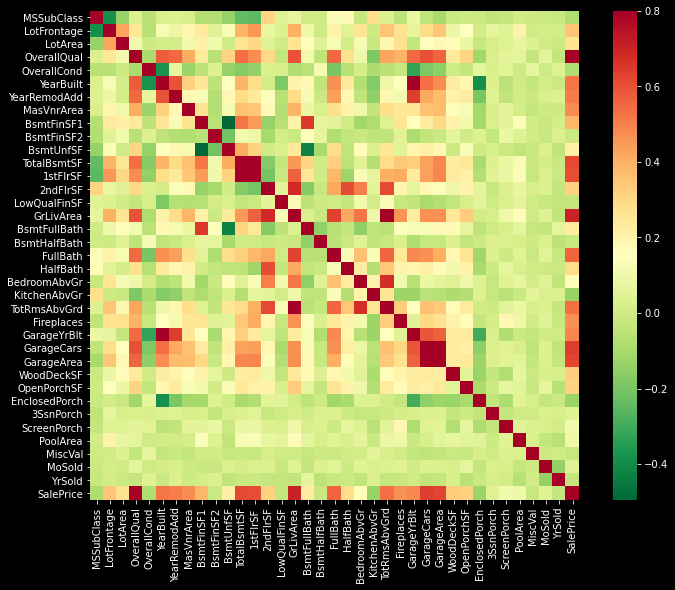

In [14]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,cmap="RdYlGn_r")

To make it more readable we can plot only those variables that correlate with the target variable more than 0.5:

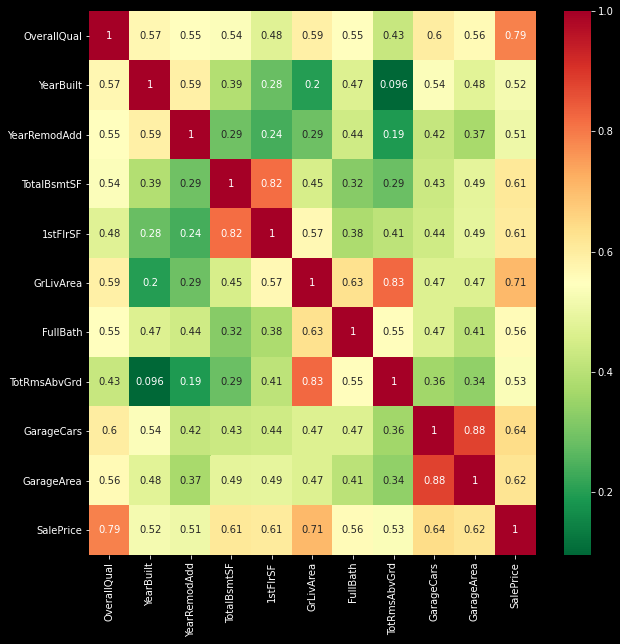

In [15]:
# most correlated features with SalePrice
corrmat = df_train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5] # to make it more readable we only included correlation factors >.5
plt.figure(figsize=(10,10))
g = sns.heatmap(df_train[top_corr_features].corr(),annot=True,cmap="RdYlGn_r")

# Outlier detection

We have two main types of outliers: - Univariate: we are looking at one variable at a time - Multivariate: even though there are no univariate outliers, we can spot some extreme values if we look at the values of multiple variables at the same time.

There are a lot of reasons why outliers occur:

   * Data Entry Errors – e.g. people make mistakes when filling in a survey.
   * Measurement Errors – e.g. a device doing various measurements can be faulty.
   * Experimental Errors – we can make a mistake when experimenting.
   * Intentional Outliers – people can make "mistakes" intentionally, for example, in a loan application.
   * Sampling Errors – e.g. we might take a sample which is too small.
   * Natural Outliers – e.g. there might be a lot of snow one year and no snow the next one.


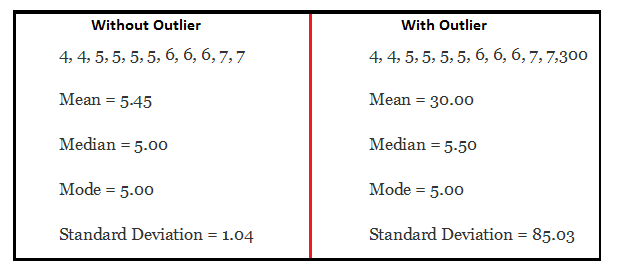

Outliers, on the other hand, strongly deviate from this distribution.

There a couple of rules of thumb which we can use to remove the outliers: 
- Any value which is beyond the range of -1.5 x IQR to 1.5 x IQR(interquartile range (IQR)). 
- Any value which is out of the range of 5th and 95th percentile. - Any value which is 3 or more standard deviations away from the mean.


Basement square footage has one outlier (is hat a bunker?)

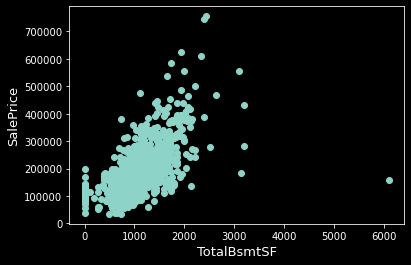

In [16]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['TotalBsmtSF'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

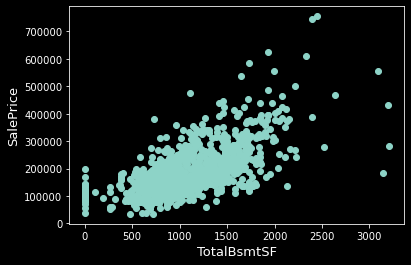

In [17]:
# delete outliers
df_train = df_train.drop(df_train[(df_train['TotalBsmtSF']>5000) & (df_train['SalePrice']<300000)].index)

# reset index
df_train = df_train.reset_index(drop=True)

# check the graphic again
fig, ax = plt.subplots()
ax.scatter(df_train['TotalBsmtSF'], df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

Let's check another numeric variable from the output of the previous tutorial: GrLivArea.

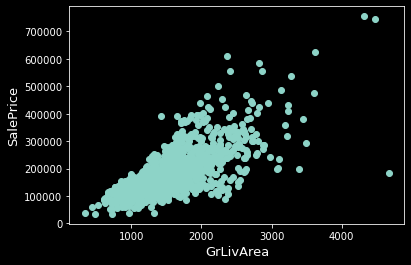

In [18]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

This is a good example of multivariate outliers. If we look only at GrLivArea there are no outliers because the largest area is quite close to the second and the third largest. However, if we take a look at SalePrice together with GrLivArea, we can see that the price of the largest house is really small,

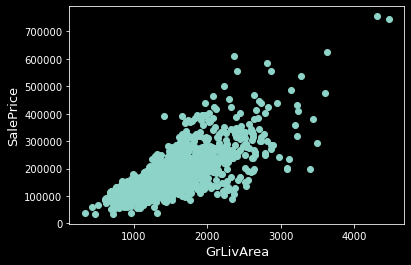

In [19]:
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)
df_train = df_train.reset_index(drop=True)

fig, ax = plt.subplots()
ax.scatter(df_train['GrLivArea'], df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

## Null Value Replacement
Why Do We Care?

Missing data in a training data set can reduce the power/fit of a model if treated as a real category, because: - Some models ignore rows with missing values effectively reducing your sample size. - It can lead to a 

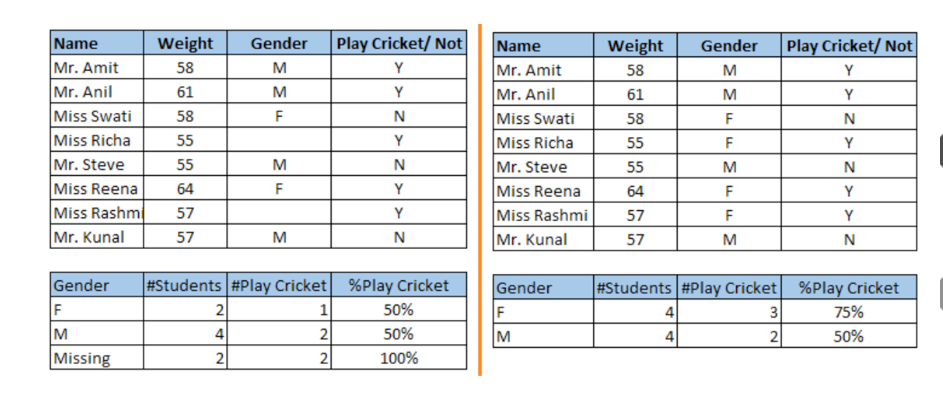

### how to deal with missing data?
[from](https://analyticsindiamag.com/5-ways-handle-missing-values-machine-learning-datasets/)
* delete the row:
    * preserve the accuracy
    * not recommended if you have a large amount of columns which may contain missing data
    * not recommended if you lose more than 30% of the data. Eliminate only the ones with little to no data
* replaced with mean/median/mode
    * approximation
    * ```data['col_name'].replace(np.NaN, data['col_name'].mean())```
    * Con can add varience and bias
* assign an unique category
    * ```data['col_name'].fillna('chosen name')```
    * another feature to model
* predict the missing value
    * considered as a proxy for true values
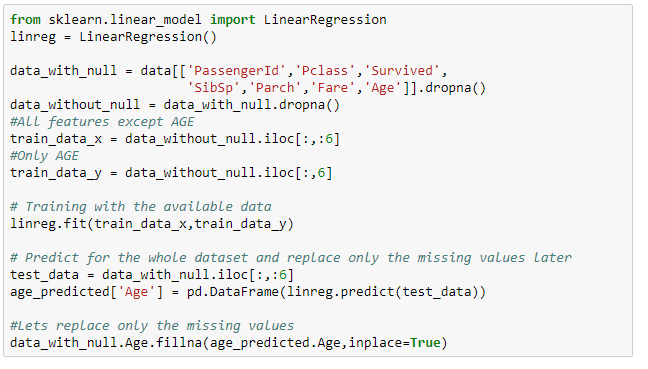

Prediction of House Prices: Null Value Replacement

In [20]:
# missing data
# really cool way to summarize the data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20) # only the first 20 rows but because of the order we don't have to go any futher

,Total,Percent
PoolQC,1452,0.995885
MiscFeature,1404,0.962963
Alley,1367,0.937586
Fence,1177,0.807270
FireplaceQu,690,0.473251
LotFrontage,259,0.177641
GarageType,81,0.055556
GarageCond,81,0.055556
GarageFinish,81,0.055556
GarageQual,81,0.055556


In [21]:
# drop 5 columns with the biggest ratio of null values
to_drop = missing_data.head(5).index.tolist()
print(to_drop)
df_train.drop(to_drop, axis=1)

['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1454,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1455,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1456,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


Be careful when removing columns. Sometimes a column can give us some relevant information even if 50% of values are Null. It's always good to be cautious when removing columns.

In [22]:
# extract the names of columns with missing values
cols_with_missing = missing_data[missing_data.Percent > 0].index.tolist()
# remove column names that are already removed from dataset
missing_cols = list(set(cols_with_missing) - set(to_drop))
# check the datatype
df_train.dtypes[missing_cols]
# we want to see which columns are of numeric datatype

MasVnrType       object
Electrical       object
BsmtQual         object
GarageType       object
BsmtExposure     object
BsmtFinType2     object
LotFrontage     float64
GarageQual       object
GarageYrBlt     float64
GarageFinish     object
BsmtCond         object
GarageCond       object
BsmtFinType1     object
MasVnrArea      float64
dtype: object

## Numeric Variables
We will create a separate column to keep the information whether the value was missing. This way, we will have this information available in this column after we replace the value in the original one.

In [23]:
num_cols_with_missing = df_train.dtypes[missing_cols][df_train.dtypes[missing_cols] == 'float'].index.tolist()
# create new variable with the information that it was missing
for cl in num_cols_with_missing:
    df_train[cl + "_missing_ind"] = 0
    df_train.loc[df_train[cl].isnull(), cl + "_missing_ind"] = 1

In [24]:
num_cols_with_missing

['LotFrontage', 'GarageYrBlt', 'MasVnrArea']

This is where database knowledge comes in handily
   * LotFrontage – We replace the missing values with the mean.
   * GarageYrBlt – If the house has a garage and the year is missing, we assume it's the minimum value available.
   * MasVnrArea – If the veneer area is missing, we assume it's 0.


In [25]:
df_train["LotFrontage"] = df_train["LotFrontage"].fillna(df_train["LotFrontage"].mean())
df_train["GarageYrBlt"] = df_train["GarageYrBlt"].fillna(df_train["GarageYrBlt"].min())
df_train["MasVnrArea"] = df_train["MasVnrArea"].fillna(0)

## Object (String) Variables

In [26]:
#Find the variables with the dtype == "object" and having at least one missing value.

In [27]:
# 2. for categorical variables:
df_train.dtypes[missing_cols][df_train.dtypes[missing_cols] == 'object']
cat_cols_with_missing = df_train.dtypes[missing_cols][df_train.dtypes[missing_cols] == 'object'].index.tolist()

In [28]:
# With the help of the data documentation we have, 
# we can figure out that the missing values in Garage and 
# Basement variables mean no garage and no basement respectively.

# GarageFinish : data description says NA means "no garage"
df_train["GarageFinish"] = df_train["GarageFinish"].fillna("None")
# GarageCond : data description says NA means "no garage"
df_train["GarageCond"] = df_train["GarageCond"].fillna("None")
# GarageQual : data description says NA means "no garage"
df_train["GarageQual"] = df_train["GarageQual"].fillna("None")
# GarageType : data description says NA means "no garage"
df_train["GarageType"] = df_train["GarageType"].fillna("None")

# BsmtExposure : data description says NA means "no basement"
df_train["BsmtExposure"] = df_train["BsmtExposure"].fillna("None")
# BsmtFinType2 : data description says NA means "no basement"
df_train["BsmtFinType2"] = df_train["BsmtFinType2"].fillna("None")
# BsmtFinType1 : data description says NA means "no basement"
df_train["BsmtFinType1"] = df_train["BsmtFinType1"].fillna("None")
# BsmtCond : data description says NA means "no basement"
df_train["BsmtCond"] = df_train["BsmtCond"].fillna("None")
# BsmtQual : data description says NA means "no basement"
df_train["BsmtQual"] = df_train["BsmtQual"].fillna("None")

The information about Electrical and MasVnrType is missing in the documentation. Since we are dealing with categorical variables, we will create a new category for a missing value.

In [29]:
df_train["Electrical"] = df_train["Electrical"].fillna("Empty")
df_train["MasVnrType"] = df_train["MasVnrType"].fillna("Empty")

In [30]:

# missing data second 
# really cool way to summarize the data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10) # only the first 20 rows but because of the order we don't have to go any futher

,Total,Percent
PoolQC,1452,0.995885
MiscFeature,1404,0.962963
Alley,1367,0.937586
Fence,1177,0.807270
FireplaceQu,690,0.473251
BsmtQual,0,0.000000
Exterior1st,0,0.000000
Exterior2nd,0,0.000000
MasVnrType,0,0.000000
MasVnrArea,0,0.000000


## Value transfomation

Big fan of logarithmic scales as it allows you to show both small and large numbers
[When to scale your features](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e)

In [31]:
# Since we are going to apply different transformations to different data types
# we start by extracting the numeric feature names:
num_feats = df_train.dtypes[df_train.dtypes != 'object'].index.tolist()
num_feats[:5]

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond']

/home/henri/miniconda2/envs/lighthouse-lab-course/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='1stFlrSF', ylabel='Density'>

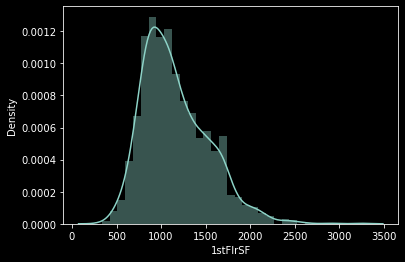

In [32]:
sns.distplot(df_train["1stFlrSF"])

/home/henri/miniconda2/envs/lighthouse-lab-course/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='1stFlrSF_log', ylabel='Density'>

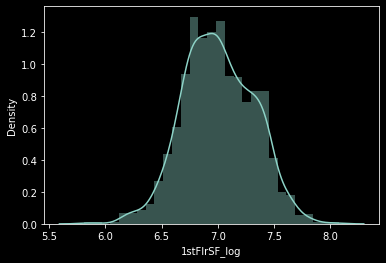

In [33]:
# log transformation
# THIS IS HOW YOU DO A LOG TRANSFORMATION!!!
df_train["1stFlrSF_log"] = df_train["1stFlrSF"].apply(np.log)
sns.distplot(df_train["1stFlrSF_log"])

/home/henri/miniconda2/envs/lighthouse-lab-course/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='OverallQual', ylabel='Density'>

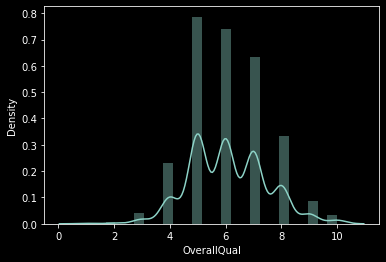

In [34]:
sns.distplot(df_train["OverallQual"])

In [35]:
# Scaling
from sklearn.preprocessing import StandardScaler
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

# !!! Look for other variables that can be improved by some type of transformation.!!!
df_train["1stFlrSF_log_scaled"] = 0 #

scaller = StandardScaler()
df_train_scaled = pd.DataFrame(scaller.fit_transform(df_train[num_feats+["1stFlrSF_log", "OverallQual"]].astype(float)))
df_train_scaled

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0.073426,-0.228085,-0.203934,0.658506,-0.517649,1.052959,0.880362,0.523937,0.617283,-0.288867,...,-0.063709,-0.087748,-1.601578,0.138375,0.346896,-0.464772,-0.242536,-0.074278,-0.806414,0.658506
1,-0.871868,0.485078,-0.087252,-0.068293,2.177825,0.158428,-0.428115,-0.570739,1.245719,-0.288867,...,-0.063709,-0.087748,-0.490155,-0.614427,0.007136,-0.464772,-0.242536,-0.074278,0.428328,-0.068293
2,0.073426,-0.085453,0.080162,0.658506,-0.517649,0.986698,0.831900,0.334044,0.108989,-0.288867,...,-0.063709,-0.087748,0.991743,0.138375,0.535652,-0.464772,-0.242536,-0.074278,-0.577066,0.658506
3,0.309749,-0.465806,-0.092325,0.658506,-0.517649,-1.862551,-0.718888,-0.570739,-0.514826,-0.288867,...,-0.063709,-0.087748,-1.601578,-1.367230,-0.515088,-0.464772,-0.242536,-0.074278,-0.438379,0.658506
4,0.073426,0.675255,0.385566,1.385305,-0.517649,0.953567,0.734975,1.384039,0.499451,-0.288867,...,-0.063709,-0.087748,2.103167,0.138375,0.869120,-0.464772,-0.242536,-0.074278,0.118856,1.385305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,0.073426,-0.370718,-0.258014,-0.068293,-0.517649,0.920436,0.734975,-0.570739,-1.013878,-0.288867,...,-0.063709,-0.087748,0.621269,-0.614427,-0.074658,-0.464772,-0.242536,-0.074278,-0.464969,-0.068293
1454,-0.871868,0.722799,0.275478,-0.068293,0.380842,0.224690,0.153430,0.093885,0.811359,0.721263,...,-0.063709,-0.087748,-1.601578,1.643980,0.365772,-0.464772,-0.242536,-0.074278,2.006969,-0.068293
1455,0.309749,-0.180541,-0.143868,0.658506,3.076316,-1.001150,1.025748,-0.570739,-0.378511,-0.288867,...,-0.063709,4.949624,-0.490155,1.643980,1.076752,-0.464772,-0.242536,-0.074278,0.236122,0.658506
1456,-0.871868,-0.085453,-0.075381,-0.795092,0.380842,-0.702973,0.541127,-0.570739,-0.900667,6.087966,...,-0.063709,-0.087748,-0.860629,1.643980,-0.488348,-0.464772,-0.242536,-0.074278,-0.072939,-0.795092


In [36]:
# lets map ORDINAL features
df_train = df_train.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                           "BsmtCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                           "BsmtFinType1" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4,
                                             "ALQ" : 5, "GLQ" : 6},
                           "BsmtFinType2" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4,
                                             "ALQ" : 5, "GLQ" : 6},
                           "BsmtQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                           "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                           "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                           "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5,
                                           "Min2" : 6, "Min1" : 7, "Typ" : 8},
                           "GarageCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "GarageQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                           "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                           "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                           "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                           "Street" : {"Grvl" : 1, "Pave" : 2},
                           "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                         )

In [37]:
cat_feats = df_train.dtypes[df_train.dtypes == 'object'].index.tolist()
df_dummy = pd.get_dummies(df_train[cat_feats])
df_dummy.shape[1] - df_train.shape[1] # numbers of column added to the dataframe

92

## Feature engineering

A feature is typically a specific representation on top of raw data, which is an individual, measurable attribute, typically depicted by a column in a dataset. Considering a generic two-dimensional dataset, each observation is depicted by a row and each feature by a column

most feature engineering techniques deal with converting raw data into some numeric representations 

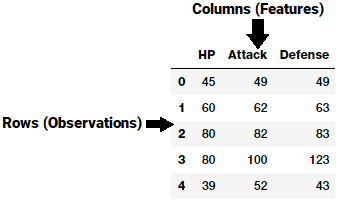

<AxesSubplot:xlabel='1stFlr_2ndFlr_SF', ylabel='SalePrice'>

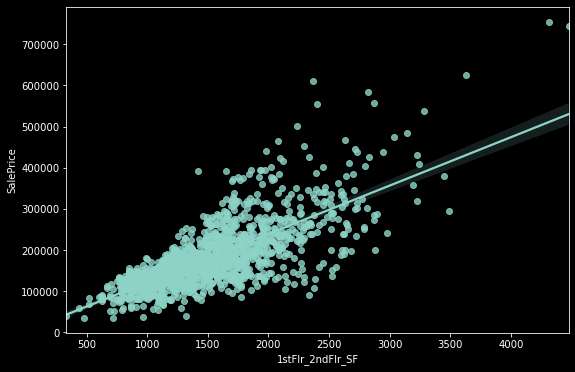

In [38]:
df_train['1stFlr_2ndFlr_SF'] = df_train['1stFlrSF'] + df_train['2ndFlrSF']


f, ax = plt.subplots(figsize=(9, 6))
# seaborn's regression plot
sns.regplot(x=(df_train['1stFlr_2ndFlr_SF']), y=df_train['SalePrice'], data=df_train, order=1)

In [39]:
# overall quality of a house
df_train["OverallGrade"] = df_train["OverallQual"] * df_train["OverallCond"]



Do you have any more ideas for new features? Try to come up with some extra.

Tips: The total square footage of everything, the overall quality of exterior, the total number of bathrooms, the square footage of the porch.


## Simplification of the Existing Features

We are going to work with ordinal features. We have mapped them to numbers in the previous tutorial. Let's check the distribution per category of GarageQual.

[]

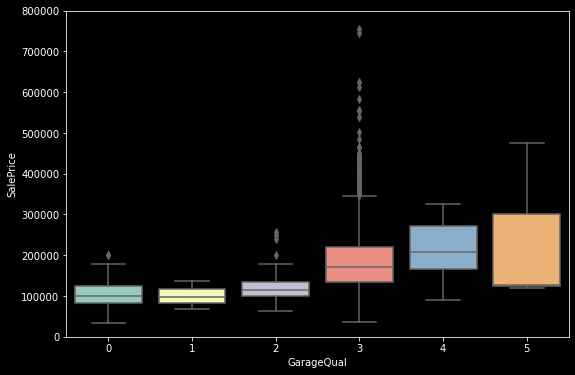

In [40]:
var = 'GarageQual'
f, ax = plt.subplots(figsize=(9, 6))
data = df_train[['SalePrice',var]]
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
fig.plot()

### Simplification of the Existing Features

We are going to work with ordinal features. We have mapped them to numbers in the previous tutorial. Let's check the distribution per category of GarageQual.

In [41]:
df_train["SimplGarageQual"] = df_train.GarageQual.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })

(-0.5, 2.5, 0.0, 800000.0)

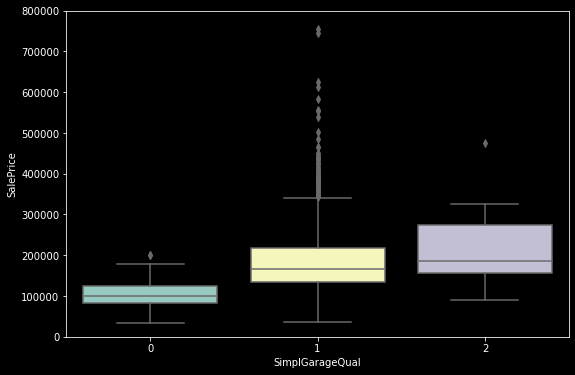

In [42]:
var = 'SimplGarageQual'
f, ax = plt.subplots(figsize=(9, 6))
data = df_train[['SalePrice',var]]
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

In [43]:
final_num_feats = df_train.dtypes[df_train.dtypes != 'object'].index.tolist()
df_numeric = df_train[final_num_feats]

## W4-D1 

In [44]:
y = df_numeric.SalePrice
df_numeric.drop("SalePrice",axis=1, inplace=True)

/home/henri/miniconda2/envs/lighthouse-lab-course/lib/python3.8/site-packages/pandas/core/frame.py:4162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Part 1: Removing Features With Small Variance

First of all, we will remove the columns with very little variance. Small variance equals small predictive power because all houses have very similar values.

In [45]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(0.1)
df_transformed = vt.fit_transform(df_numeric)

In [47]:
df_transformed

array([[   60.,    65.,  8450., ...,     0.,  1710.,    35.],
       [   20.,    80.,  9600., ...,     0.,  1262.,    48.],
       [   60.,    68., 11250., ...,     0.,  1786.,    35.],
       ...,
       [   70.,    66.,  9042., ...,     0.,  2340.,    63.],
       [   20.,    68.,  9717., ...,     0.,  1078.,    30.],
       [   20.,    75.,  9937., ...,     0.,  1256.,    30.]])

fit_transform() in sklearn transforms an object from DataFrame to nd.array and we are losing column names, so we need to do some tricks to get them back!

In [49]:
# columns we have selected
# get_support() is method of VarianceThreshold and stores boolean of each variable in the numpy array.
selected_columns = df_numeric.columns[vt.get_support()]
# transforming an array back to a data-frame preserves column labels
df_transformed = pd.DataFrame(df_transformed, columns = selected_columns)

In [50]:
df_transformed

,MSSubClass,LotFrontage,LotArea,Alley,LotShape,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,LotFrontage_missing_ind,1stFlr_2ndFlr_SF,OverallGrade
0,60.0,65.0,8450.0,NaN,4.0,7.0,5.0,2003.0,2003.0,196.0,...,0.0,0.0,0.0,NaN,0.0,2.0,2008.0,0.0,1710.0,35.0
1,20.0,80.0,9600.0,NaN,4.0,6.0,8.0,1976.0,1976.0,0.0,...,0.0,0.0,0.0,NaN,0.0,5.0,2007.0,0.0,1262.0,48.0
2,60.0,68.0,11250.0,NaN,3.0,7.0,5.0,2001.0,2002.0,162.0,...,0.0,0.0,0.0,NaN,0.0,9.0,2008.0,0.0,1786.0,35.0
3,70.0,60.0,9550.0,NaN,3.0,7.0,5.0,1915.0,1970.0,0.0,...,0.0,0.0,0.0,NaN,0.0,2.0,2006.0,0.0,1717.0,35.0
4,60.0,84.0,14260.0,NaN,3.0,8.0,5.0,2000.0,2000.0,350.0,...,0.0,0.0,0.0,NaN,0.0,12.0,2008.0,0.0,2198.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,60.0,62.0,7917.0,NaN,4.0,6.0,5.0,1999.0,2000.0,0.0,...,0.0,0.0,0.0,NaN,0.0,8.0,2007.0,0.0,1647.0,30.0
1454,20.0,85.0,13175.0,NaN,4.0,6.0,6.0,1978.0,1988.0,119.0,...,0.0,0.0,0.0,NaN,0.0,2.0,2010.0,0.0,2073.0,36.0
1455,70.0,66.0,9042.0,NaN,4.0,7.0,9.0,1941.0,2006.0,0.0,...,0.0,0.0,0.0,NaN,2500.0,5.0,2010.0,0.0,2340.0,63.0
1456,20.0,68.0,9717.0,NaN,4.0,5.0,6.0,1950.0,1996.0,0.0,...,0.0,0.0,0.0,NaN,0.0,4.0,2010.0,0.0,1078.0,30.0


Part 2: Removing Correlated Features

The goal of this part is to remove one feature from each highly correlated pair.

We are going to do this in 3 steps:

   * Calculate a correlation matrix
   * Get pairs of highly correlated features
   * Remove correlated columns


In [52]:
# step 1
df_corr = df_transformed.corr().abs()

# step 2
indices = np.where(df_corr > 0.8) 
indices = [(df_corr.index[x], df_corr.columns[y]) for x, y in zip(*indices)
                                    if x != y and x < y]

# step 3
for idx in indices: #each pair
    try:
        df_transformed.drop(idx[1], axis = 1, inplace=True)
    except KeyError:
        pass

In [53]:
print(indices)

[('MasVnrArea', 'PoolQC'), ('ExterQual', 'PoolQC'), ('BsmtFinSF2', 'PoolQC'), ('TotalBsmtSF', '1stFlrSF'), ('HeatingQC', 'PoolQC'), ('GrLivArea', 'TotRmsAbvGrd'), ('GrLivArea', '1stFlr_2ndFlr_SF'), ('TotRmsAbvGrd', '1stFlr_2ndFlr_SF'), ('GarageCars', 'GarageArea'), ('GarageQual', 'GarageCond')]


In [56]:
from sklearn.feature_selection import f_regression, SelectKBest
skb = SelectKBest(f_regression, k=10)
X = skb.fit_transform(df_transformed, y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').